In [1]:
import os
train_good_dir = os.path.join('data/good cocoon')


train_bad_dir = os.path.join('data/bad cocoon')

In [3]:
train_good_names = os.listdir(train_good_dir)
print(train_good_names[:10])

train_bad_names = os.listdir(train_bad_dir)
print(train_bad_names[:10])

['Annotation 2020-07-07 235313.png', 'Annotation 2020-07-07 235707.png', 'Annotation 2020-07-07 235744.png', 'Annotation 2020-07-07 235802.png', 'Annotation 2020-07-07 235833.png', 'Annotation 2020-07-07 235850.png', 'Annotation 2020-07-07 235907.png', 'Annotation 2020-07-07 235950.png', 'Annotation 2020-07-08 000024.png', 'Annotation 2020-07-08 000107.png']
['Annotation 2020-07-07 235729.png', 'Annotation 2020-07-07 235921.png', 'Annotation 2020-07-07 235936.png', 'Annotation 2020-07-08 000007.png', 'Annotation 2020-07-08 000639.png', 'Annotation 2020-07-08 000753.png', 'Annotation 2020-07-08 002539.png', 'Annotation 2020-07-08 002608.png', 'Annotation 2020-07-08 002631.png', 'Annotation 2020-07-08 002651.png']


In [5]:
# its a Balanced data set

In [6]:
print('total training good cocoon images:', len(os.listdir(train_good_dir)))
print('total training bad cocoon images:', len(os.listdir(train_bad_dir)))

total training good cocoon images: 118
total training bad cocoon images: 118


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

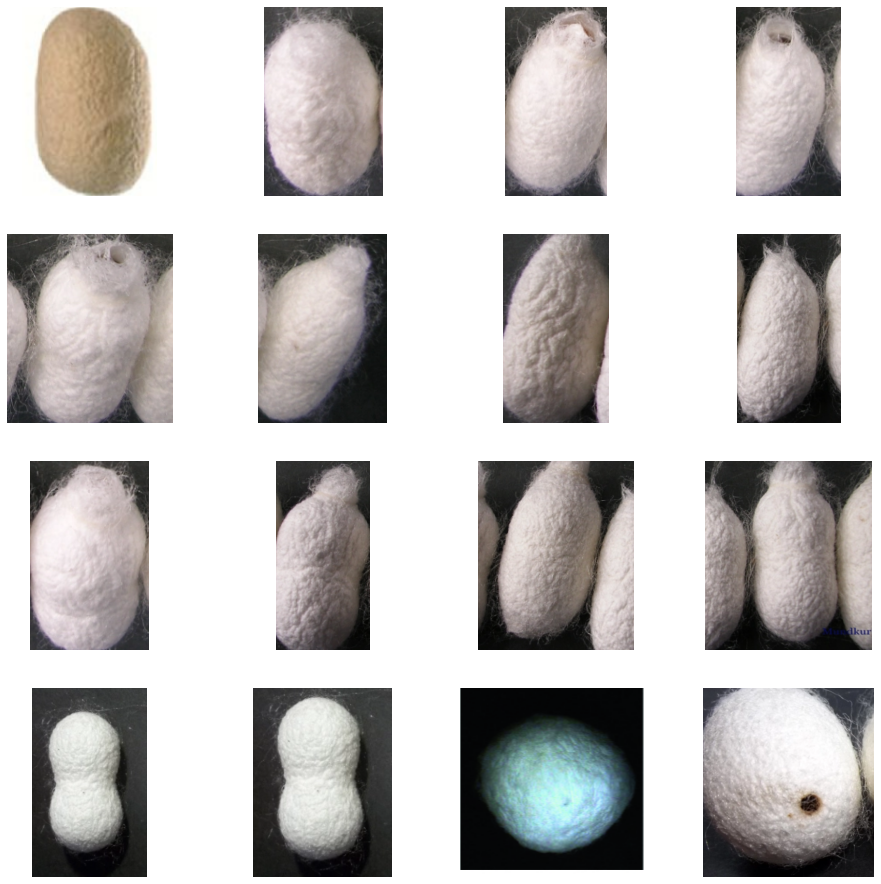

In [8]:

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_good_pix = [os.path.join(train_good_dir, fname) 
                for fname in train_good_names[pic_index-8:pic_index]]
next_bad_pix = [os.path.join(train_bad_dir, fname) 
                for fname in train_bad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_good_pix+next_bad_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') #
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [25]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        'data',  
        target_size=(300, 300),  
        batch_size=10,
        
        class_mode='binary')


Found 236 images belonging to 2 classes.


In [27]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  
      epochs=190,
      verbose=1)

Epoch 1/190
10/10 [==============================] - 1s 82ms/step - loss: 0.9400 - accuracy: 0.4479
Epoch 2/190
10/10 [==============================] - 1s 82ms/step - loss: 0.6915 - accuracy: 0.5729
Epoch 3/190
10/10 [==============================] - 1s 79ms/step - loss: 0.6905 - accuracy: 0.5500
Epoch 4/190
10/10 [==============================] - 1s 68ms/step - loss: 0.6973 - accuracy: 0.4700
Epoch 5/190
10/10 [==============================] - 1s 69ms/step - loss: 0.6956 - accuracy: 0.4896
Epoch 6/190
10/10 [==============================] - 1s 70ms/step - loss: 0.6914 - accuracy: 0.5625
Epoch 7/190
10/10 [==============================] - 1s 74ms/step - loss: 0.6878 - accuracy: 0.5625
Epoch 8/190
10/10 [==============================] - 1s 77ms/step - loss: 0.7127 - accuracy: 0.4400
Epoch 9/190
10/10 [==============================] - 1s 79ms/step - loss: 0.6995 - accuracy: 0.5000
Epoch 10/190
10/10 [==============================] - 1s 78ms/step - loss: 0.6750 - accuracy: 0.6300

10/10 [==============================] - 2s 161ms/step - loss: 0.0365 - accuracy: 0.9900
Epoch 161/190
10/10 [==============================] - 1s 130ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 162/190
10/10 [==============================] - 1s 72ms/step - loss: 9.2164e-04 - accuracy: 1.0000
Epoch 163/190
10/10 [==============================] - 1s 71ms/step - loss: 1.2127e-04 - accuracy: 1.0000
Epoch 164/190
10/10 [==============================] - 1s 74ms/step - loss: 1.5808e-04 - accuracy: 1.0000
Epoch 165/190
10/10 [==============================] - 1s 70ms/step - loss: 5.0406e-05 - accuracy: 1.0000
Epoch 166/190
10/10 [==============================] - 1s 73ms/step - loss: 1.2880e-04 - accuracy: 1.0000
Epoch 167/190
10/10 [==============================] - 1s 108ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 168/190
10/10 [==============================] - 2s 183ms/step - loss: 0.3660 - accuracy: 0.9400
Epoch 169/190
10/10 [==============================] - 1s 124ms/step - l

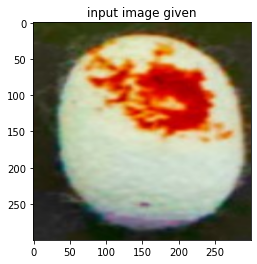

the input imsage is :defective cocoon


In [28]:
import cv2
from matplotlib import pyplot as plt

import numpy as np

img = cv2.imread('test_b.jpg')
dis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img,(300,300))
dis= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = np.reshape(img,[1,300,300,3])

classes = model.predict_classes(img)
plt.imshow(dis)
plt.title('input image given')
plt.show()
if(classes==0):
    print("the input imsage is :defective cocoon")
else:
    print("the input image is :good cocooon")
